In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
film = pd.read_csv(r"C:\Users\Ngoc Minh\Downloads\big data\Nhom_5_Mid_term_1\cleaned_data.csv")

In [41]:
pd.set_option('display.max_columns', None) # hiển thị full cột
# pd.set_option('display.max_rows', None) -  hiển thị full dòng 

In [42]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35283 entries, 0 to 35282
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   orderid       35283 non-null  object
 1   cashier       35283 non-null  object
 2   saledate      35283 non-null  object
 3   total         35283 non-null  int64 
 4   customerid    35283 non-null  object
 5   ticketcode    35283 non-null  int64 
 6   date          35283 non-null  object
 7   time          35283 non-null  object
 8   slot          35283 non-null  object
 9   room          35283 non-null  int64 
 10  show_id       35283 non-null  object
 11  slot type     35283 non-null  object
 12  ticket type   35283 non-null  object
 13  ticket price  35283 non-null  int64 
 14  popcorn       35283 non-null  object
 15  DOB           35283 non-null  object
 16  Gender        35283 non-null  object
 17  Quận/Huyện    35283 non-null  object
 18  Tỉnh          35283 non-null  object
 19  job 

In [4]:
film.head()

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,show_id,slot type,ticket type,ticket price,popcorn,DOB,Gender,Quận/Huyện,Tỉnh,job,industry,title,director,country,rating,listed_in
0,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074925,2019-05-06,18:15:00,G04,3,s966,ĐƠN,Thành viên,45000,Không,1999-04-18,Nữ,Thanh Khê,Đà Nẵng,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction"
1,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074924,2019-05-06,18:15:00,G03,3,s966,ĐƠN,Thành viên,45000,Không,1999-04-18,Nữ,Thanh Khê,Đà Nẵng,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction"
2,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097042,2019-05-22,20:45:00,E04,2,s1231,ĐƠN,Thành viên,45000,Không,1998-04-16,Nam,Sơn Trà,Đà Nẵng,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action
3,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097041,2019-05-22,20:45:00,E03,2,s1231,ĐƠN,Thành viên,45000,Không,1998-04-16,Nam,Sơn Trà,Đà Nẵng,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action
4,10130052019B0141,emp005,2019-05-30,90000,0000000034,20106761,2019-05-30,19:30:00,F04,1,s1232,ĐƠN,Thành viên,45000,Không,1998-04-16,Nam,Sơn Trà,Đà Nẵng,student,health service,NGÔI ĐỀN KỲ QUÁI (Pee Nak),Phontharis Chotkijsadarsopon,Thailand,PG-13,"Comedy, Horror"


In [44]:
film['saledate'] = pd.to_datetime(film['saledate'])
film['saledate'].dtypes

film['saledate'] = film['saledate'].dt.strftime('%m-%d')


In [43]:
total_bydate = film.groupby("saledate")['total'].sum()

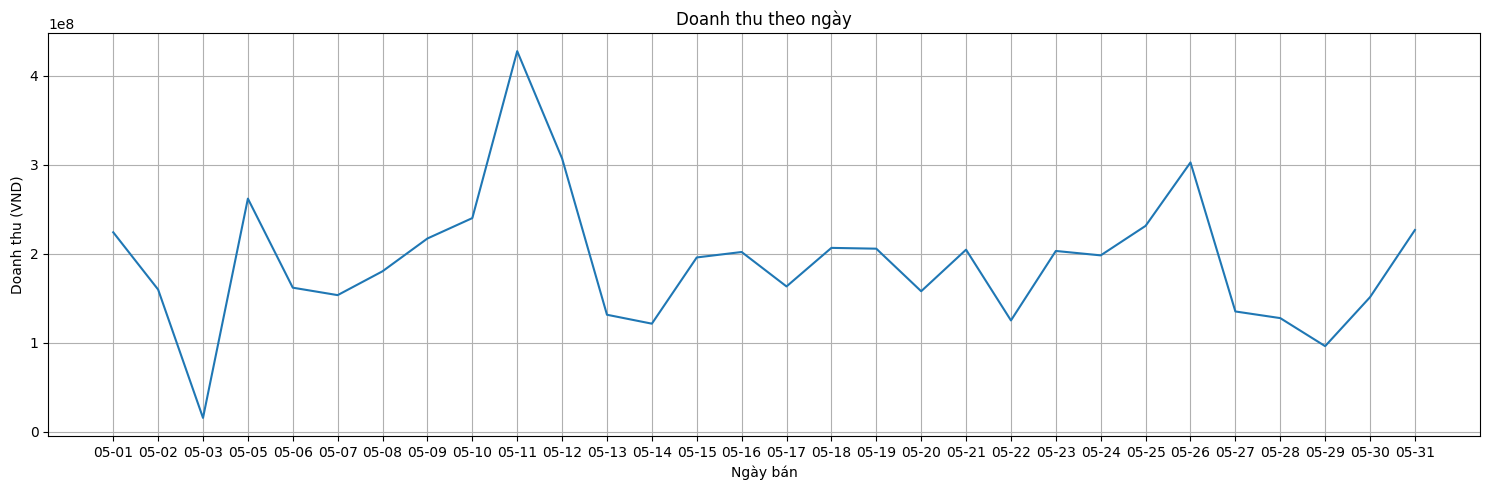

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))

# Vẽ từng đơn hàng theo thời gian
ax.plot(total_bydate.index, total_bydate.values)

# Tuỳ chỉnh trục
ax.set_title("Doanh thu theo ngày")
ax.set_xlabel("Ngày bán")
ax.set_ylabel("Doanh thu (VND)")
ax.grid(True)

plt.tight_layout()
plt.show()


In [60]:
total_rating = film.groupby('rating')['total'].sum()
total_rating = total_rating.sort_values(ascending=False)

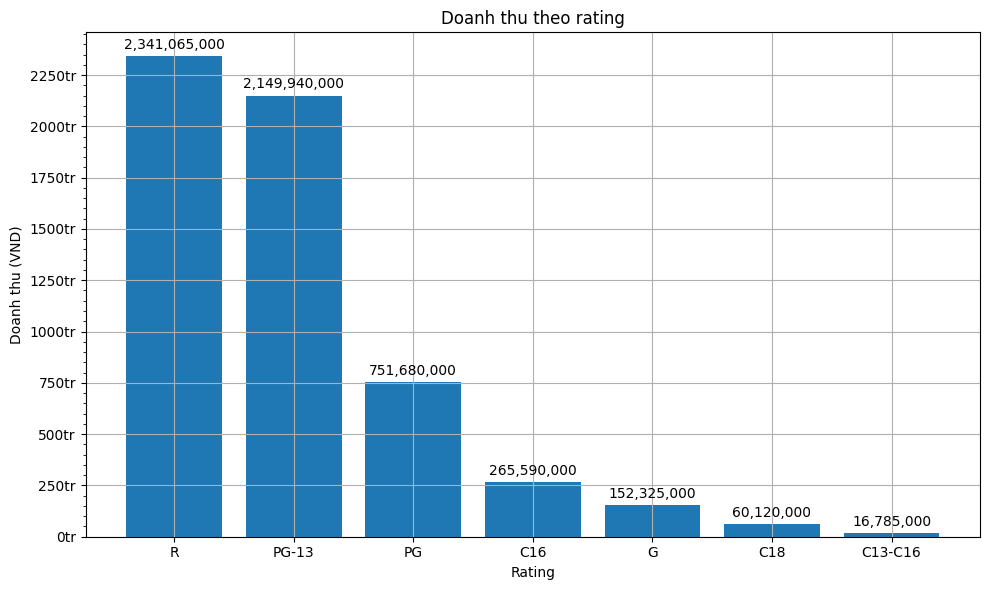

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ từng đơn hàng theo thời gian
total_rating_barplot = ax.bar(total_rating.index, total_rating.values)
ax.grid(True)
# Tuỳ chỉnh trục
ax.set_title("Doanh thu theo rating")
ax.set_xlabel("Rating")
ax.yaxis.set_major_locator(ticker.MultipleLocator(250_000_000))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
ax.bar_label(total_rating_barplot, labels=[f"{v:,}" for v in total_rating.values], padding=3)
ax.set_ylabel("Doanh thu (VND)")

plt.tight_layout()
plt.show()